In [16]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

rcParams['figure.figsize'] =7.8 ,3.9
rcParams['legend.fontsize'] = 11
rcParams["figure.dpi"] = 300
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 11}
plt.rc('font', **font)

In [2]:
#datelist = pd.date_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
datelist = pd.date_range(start="2017-05-01", end="2017-05-06").strftime("%Y-%m-%d").astype(str).to_list()

#datelist = ["2017-03-23"]

In [3]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p3.p"))

In [4]:
rmsi_2A_p1 = rmsi_all_p1[rmsi_all_p1<2]

rmsi_2A_p2 = rmsi_all_p2[rmsi_all_p2<2]

rmsi_2A_p3 = rmsi_all_p3[rmsi_all_p3<2]

(736449.9166666666, 736455.9097222222)

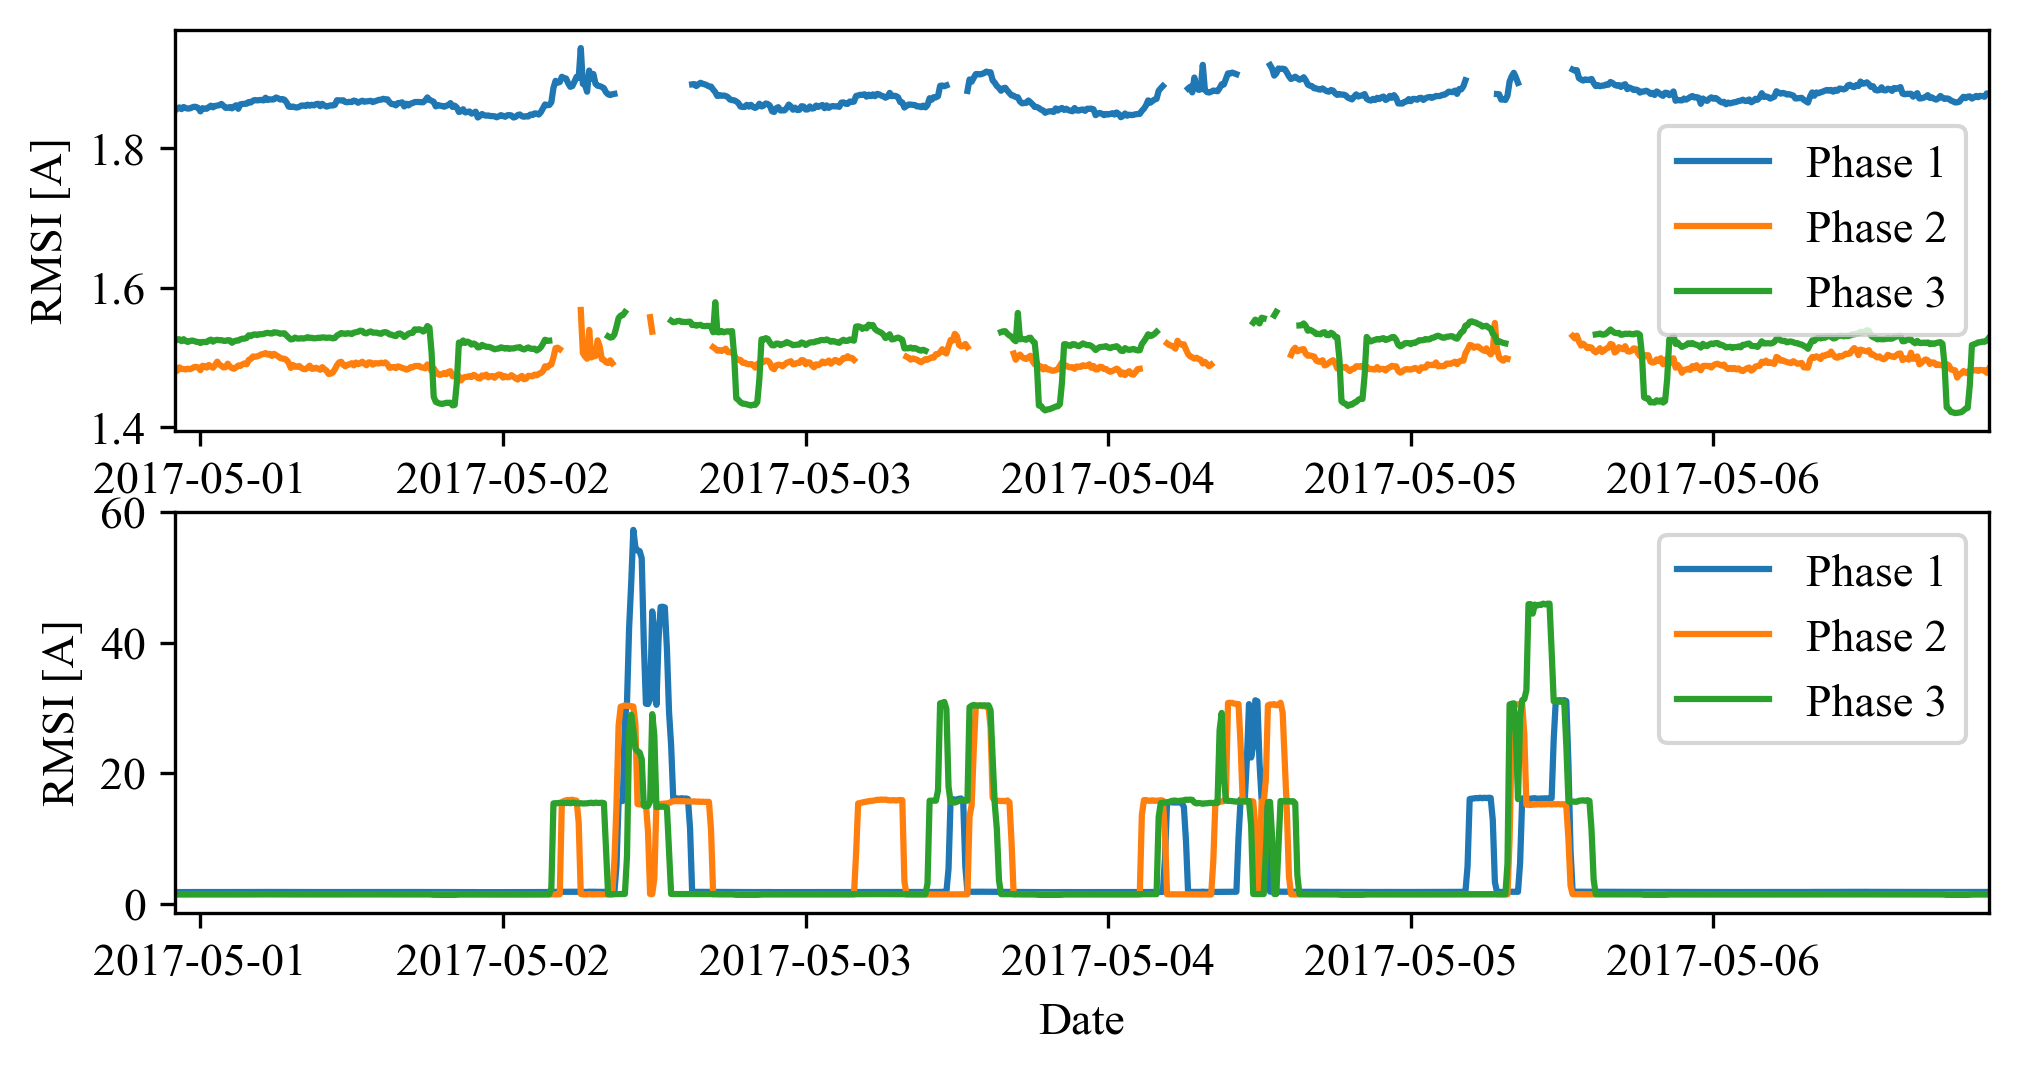

In [21]:
fig, ax = plt.subplots(2)
#ax.scatter(rmsi_2A_p1.index, rmsi_2A_p1)
ax[0].plot(rmsi_2A_p1, label="Phase 1")
ax[0].plot(rmsi_2A_p2, label="Phase 2")
ax[0].plot(rmsi_2A_p3, label="Phase 3")
ax[0].set_ylabel('RMSI [A]')
ax[0].set_xlabel('Date')
ax[0].legend()
ax[0].set_xlim(rmsi_2A_p1.index[0], rmsi_2A_p1.index[-1])
ax[1].plot(rmsi_all_p1, label="Phase 1")
ax[1].plot(rmsi_all_p2, label="Phase 2")
ax[1].plot(rmsi_all_p3, label="Phase 3")
ax[1].set_ylabel('RMSI [A]')
ax[1].set_xlabel('Date')
ax[1].legend()
ax[1].set_xlim(rmsi_all_p1.index[0], rmsi_all_p1.index[-1])


In [34]:
d = {"rmsi_2A_p1": rmsi_2A_p1.values.flatten(),"rmsi_2A_p2": rmsi_2A_p2.values.flatten(),"rmsi_2A_p3": rmsi_2A_p3.values.flatten(),"rmsi_p1": rmsi_all_p1.values.flatten(),"rmsi_p2": rmsi_all_p2.values.flatten(),"rmsi_p3": rmsi_all_p3.values.flatten() }

df = pd.DataFrame(data=d, index=rmsi_2A_p1.index.tz_localize(None))
#df.index = rmsi_2A_p1.index
df.to_excel("3-7.xlsx")